# Radial basis functions

## Linear combination of general basis functions

This notebook contains studies on radial basis functions interpolation, to be used as part of surrogate optimization. This optimization method uses a *surrogate* (also known as metamodel, or surface response model) model to appoximate a given function $f:R^d\rightarrow R$.

Follows the basic idea of approximating the function as a linear conbination of basis functions of $\vec{x}$:

\begin{equation}
\mathbf{h} = w_0\mathbf{\varphi_0}(\mathbf{x}) + w_1\mathbf{\varphi_1}(\mathbf{x})+\dots+w_n\mathbf{\varphi_n}(\mathbf{x})=\sum_{i=1}^n w_i\mathbf{\varphi_i}(\mathbf{x})
\end{equation}

Written in matrix notation:

\begin{equation}
    \mathbf{h} =
    \left[
    {\begin{array}{cc}
    \mathbf{\varphi_0}(\mathbf{x}) & \mathbf{\varphi_1}(\mathbf{x}) & \dots & \mathbf{\varphi_n}(\mathbf{x})
    \end{array} }
    \right]\mathbf{w}
\end{equation}

From this general form, derives linear, polynomial and other basis functions combinations.

>Note that $\mathbf{\varphi_i}$ arefunctions of the **vector** $\mathbf{x}$. For linear combination, normally each function $\mathbf{\varphi_i}$ is dependent of a single component of $\mathbf{x}$, but in a general form it depends of all the componentes of $\mathbf{x}$, as does radial basis functions.

## Radial basis functions

Radial basis functions interpolation uses a special set of functions, based on univariate (radial) functions and a set of observed data.

Given a set of $m$ points in $R^d$, let's refer to them as $\left\{\mathbf{\hat{x}}_1,\ldots, \mathbf{\hat{x}}_m \right\}$, where the function $f:R^d \rightarrow R$ evaluation is known. The function is approximated by the linear combination of $m$ basis functions $\mathbf{\varphi_i(x)}$:

\begin{equation}
    \mathbf{h} =
    \left[
    {\begin{array}{cc}
    \mathbf{\varphi_0}(\mathbf{x}) & \mathbf{\varphi_1}(\mathbf{x}) & \dots & \mathbf{\varphi_m}(\mathbf{x})
    \end{array} }
    \right]\mathbf{w}
\end{equation}

This functions are defined as:

$$\varphi_i\left(\mathbf{x}\right)=\gamma( \Vert \mathbf{x}-\mathbf{\hat{x}_i} \Vert)$$

Where $\Vert \mathbf{v} \Vert$, denotes the norm of the vector $\mathbf{v}$ and $\gamma$ is an univariate, normally continuous function called a **radial basis function**. There are several types of radial basis functions that could be used:

## Example

Let's illustrate how three different regressions techniques can be derived from the same idea of approximating a vector in respect to a linear combination of a new basis: inear regression, polynomial regression and radial basis functions.

Given a data sample $\mathbf{\hat{x}}$:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
X = np.array(
    [[1.0, 4.2],
     [1.4, 2.3],
     [4.2, 1.4],
     [3.8, 3.8],
     [3.0, 2.6],
     [2.6, 3.4],
     [2.6, 4.2],
     [4.6, 4.6],
     [4.6, 1.8],
    ]
)
y = np.array([2.0, 2.2, 2.0, 2.5, 1.5, 1.4, 2, 2.2, 2])

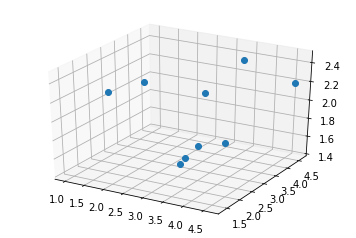

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(X[:,0],X[:,1],y,'o')
plt.show()

Now suppose we need to find an approximation for new points $\mathbf{x}$ given by:

In [4]:
X1, X2 = np.meshgrid(np.linspace(1,5,21), np.linspace(1,5,21))
x1 = X1.flatten()
x2 = X2.flatten()

### Using linear regression

Linear regression is an approximation of the $y$ written in respect of very basic basis functions. Given $\mathbf{x} \in R^d$, the basis function $\mathbf{\varphi}(\mathbf{x})$ are defined as:

$$\mathbf{\varphi_0}(\mathbf{x})=1\,,\mathbf{\varphi_1}(\mathbf{x})=(x_1)\,,\ldots\,,\mathbf{\varphi_d}(\mathbf{d})=(x_1)$$

In [5]:
m, n = X.shape
A = np.ones((m,n+1))
A[:,1] = X[:,0]
A[:,2] = X[:,1]
y_A = np.linalg.solve(np.dot(A.T,A),np.dot(A.T,y))
y_hat_lg = np.dot(A,y_A)

m = x1.shape[0]
AA = np.ones((m,3))
AA[:,1]=x1
AA[:,2]=x2
new_y_hat_lg = np.dot(AA,y_A)

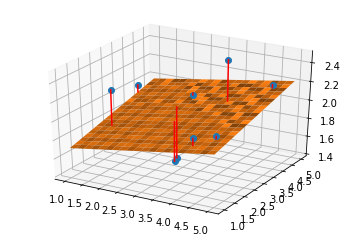

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(X[:,0],X[:,1],y,'o')
for i in range(X.shape[0]):
    ax.plot([X[i,0], X[i,0]],[X[i,1], X[i,1]],[y[i],y_hat_lg[i]],'r')
ax.plot_surface(X1,X2,new_y_hat_lg.reshape((21,21)))
plt.show()

### Using polynomial regression with least squares

In [7]:
m, n = X.shape
A = np.ones((m,n+4))
A[:,1] = X[:,0]
A[:,2] = X[:,1]
A[:,3] = X[:,0]**2
A[:,4] = X[:,1]**2
A[:,5] = X[:,0]*X[:,1]
y_A = np.linalg.solve(np.dot(A.T,A),np.dot(A.T,y))
y_hat_pg = np.dot(A,y_A)

m = x1.shape[0]
AA = np.ones((m,6))
AA[:,1]=x1
AA[:,2]=x2
AA[:,3]=x1**2
AA[:,4]=x2**2
AA[:,5]=x1*x2
new_y_hat_pg= np.dot(AA,y_A)

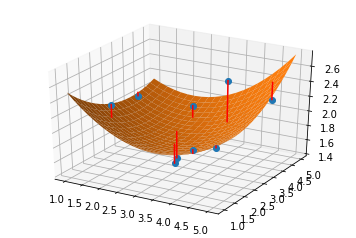

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(X[:,0],X[:,1],y,'o')
for i in range(X.shape[0]):
    ax.plot([X[i,0], X[i,0]],[X[i,1], X[i,1]],[y[i],y_hat_pg[i]],'r')
ax.plot_surface(X1,X2,new_y_hat_pg.reshape((21,21)))
plt.show()

### Using radial basis function

In [9]:
from numba import njit, void, f8, i8
@njit(f8[:,:](f8[:,:],f8[:,:]))
def create_basis_functions(x,xk):
    n, d = xk.shape
    m, d = x.shape
    RBF = np.zeros((m,n))
    for i in range(m):
        for j in range(n):
            RBF[i,j] = np.linalg.norm(x[i,:] - xk[j,:])
    return RBF

In [10]:
RBF = create_basis_functions(X,X)
y_RBF = np.linalg.solve(RBF,y)
y_hat_rbf = np.dot(RBF,y_RBF)

newX = np.zeros((x1.shape[0], 2))
newX[:,0] = x1
newX[:,1] = x2
RBF = create_basis_functions(newX, X)
new_y_hat_rbf = np.dot(RBF,y_RBF)

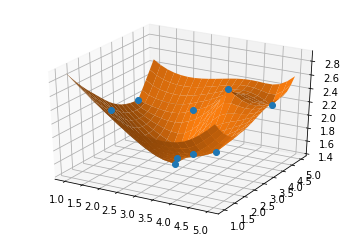

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(X[:,0],X[:,1],y,'o')
for i in range(X.shape[0]):
    ax.plot([X[i,0], X[i,0]],[X[i,1], X[i,1]],[y[i],y_hat_rbf[i]],'r')
ax.plot_surface(X1,X2,new_y_hat_rbf.reshape((21,21)))
plt.show()